# **MODEL PARAMETERS AND HYPER PARAMETERS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



  
    
    
    def myfunction(fname,lname):
    print(fname+""lname+)
    myfunction("Emil","Eby")

As we know that there are parameters that are internally learned from the given dataset and derived from the dataset,they are represented in making predictions,classifications and etc.

These are so-called Model Parameters,and they are varying with respect to the nature of the data we couldnt control this since it depends on the data.

Like 'm' and 'C'(m is slope and c is y intercept) in linear equation,which is the value of coefficents learned from the given dataset.

As we know that there are parameters that are internally learned from the given dataset and derived from the dataset,they are represented in making predictions,classifications and etc.These are so-called Model Parameters, and
they are varying with respect to the nature of the data we couldnt control this since it depends on the data.

Like 'm' and 'C'(m is slope and c is y intercept) in linear equation,which is the value of coefficents learned from the given dataset



**Hyper parameter** **Tuning** refers to the process of choosing the optimum set of hyperparameters for a machine learning model. This process is also called **hyperparameter optimization**



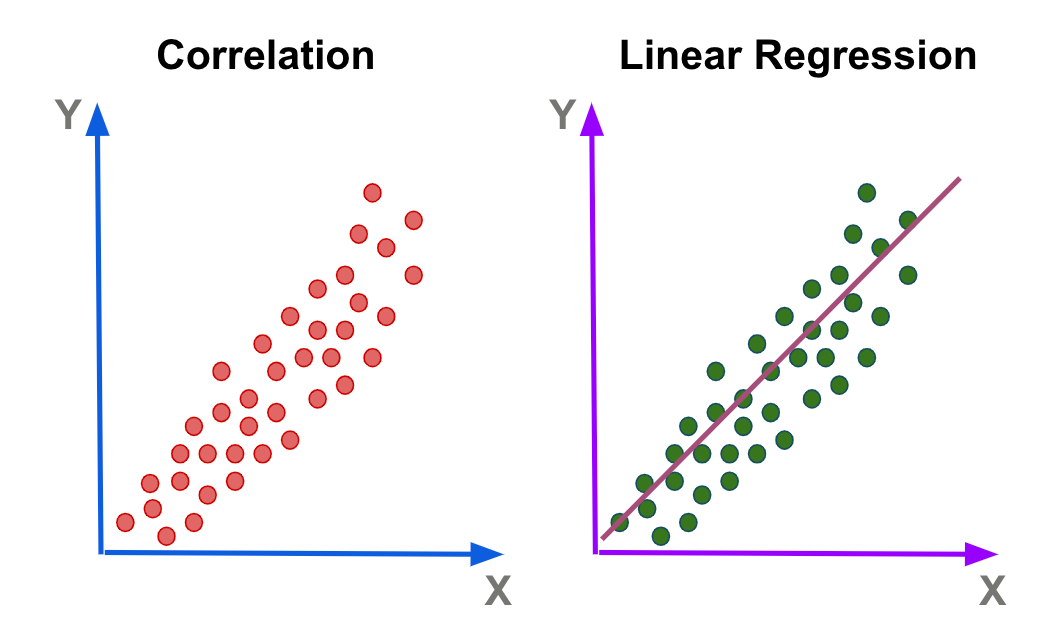

**PARAMETERS**

**Parameters** in machine learning and deep learning are the values your learning algorithm can change independently as it learns.

Two types

1)A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data. Hyperparamters are parameters whose values control the learning process these are adjustable parameters used to obtain an optimal model. External Parameters.

2)A model parameter is a variable of the selected model which can be estimated by fitting the given data to model.

A model hyperparameter, is the parameter whose value is set before the model start training They cannot be learned by fitting the model to the data.



# **GridSearch CV and RandomSearch CV**

**Grid-Search:** To implement the Grid-Search,we have a Scikit-Learn library called **GridSearchCV**.

The computaional time would be long,but it would reduce the manual efforts by avoiding the 'n' number of lines of code.

Library itself perform the search operations and return the performing model and its score in which each model are build for each permutation of a given hyperparameter, internally it would be evaluated and ranked across the given cross-validation folds.


# **Cross-Validation**

**Cross Validation** is a technique used in machine learning to evaluate the performance of a model on unseen data.It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set,and training the model on the remaining folds.


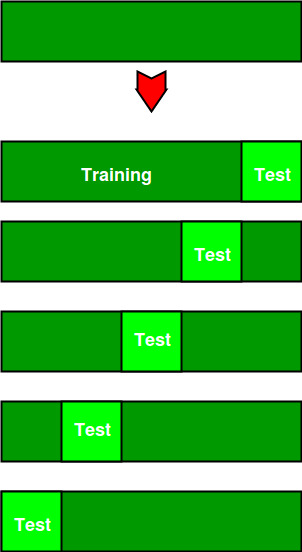

**Random Search:** The Grid Search one that we have discussed above usually increases the complexity in terms of the computational flow,

So sometimes GS is considered inefficent since it attempts all the combinations of given hyperparameters. But the Randomized Search is used

to train the models based on random hyperparameters and combinations. Obviously the number of training models are small column that grid search.

In simple terms,in Random Search, in a given grid, the list of hyperparameters are trained our model on a random combination of given hyperparameters.



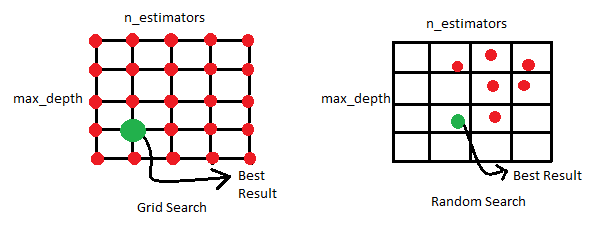

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/MACHINE LEARNING/HYPER PARAMETER TUNING/Copy of diabetes (1) (2) (1) (1) (1).csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
corr_matrix = df.corr()['Outcome']
corr_matrix

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [10]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7552083333333334

In [14]:
cls1 = KNeighborsClassifier()


# **GridSearch CV**

In [15]:
params = {'n_neighbors':[3,5,7,9,11], 'weights' : ['uniform', 'distance']}

clf = GridSearchCV(cls1, params, cv = 10, scoring = 'accuracy')
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
clf.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [17]:
clf2 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform')
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
accuracy_score(y_test, y_pred)

0.7708333333333334

# **RandomSearch CV**

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [19]:
clf = RandomForestClassifier(n_estimators = 50)

In [20]:
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramet

In [21]:
para_dist = {'max_depth' : [3,4,5,6, None],
             'max_features' : sp_randint(1,11),
             'min_samples_split' : sp_randint(2,11),
             'criterion' : ['gini', 'entropy']}

In [22]:
randomCV = RandomizedSearchCV(clf, param_distributions = para_dist, cv = 3)

In [23]:
randomCV.fit(x_train, y_train)
print(randomCV.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 7}


In [24]:
print(randomCV.score(x_test,y_test))

0.8072916666666666
